In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## 1. Import data

In [3]:
data_path = 'C:/Users/liumh/OneDrive/datasciencetask/datasciencepositionatholmusk/'
bill_amount = pd.read_csv(data_path + 'bill_amount.csv')
bill_id = pd.read_csv(data_path + 'bill_id.csv')
clinical_data = pd.read_csv(data_path + 'clinical_data.csv').rename(columns = {'id': 'patient_id'}) # patient_id unique
demographics = pd.read_csv(data_path + 'demographics.csv') # unique rows

## 2. Understand data

In [4]:
bill_amount.head(), bill_amount.shape, len(bill_amount.bill_id.unique())
bill_id.head(), bill_id.shape, len(bill_id.bill_id.unique()), len(bill_id.patient_id.unique()), len(bill_id.date_of_admission.unique()), 
clinical_data.head(), clinical_data.shape, len(clinical_data.patient_id.unique()), len(clinical_data.date_of_admission.unique()), 
demographics.head(), demographics.shape, len(demographics.patient_id.unique())

(      bill_id       amount
 0    40315104  1552.634830
 1  2660045161  1032.011951
 2  1148334643  6469.605351
 3  3818426276   755.965425
 4  9833541918   897.347816, (13600, 2), 13600)

(      bill_id                        patient_id date_of_admission
 0  7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01
 1  6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
 2  7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01
 3  3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
 4  7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01,
 (13600, 3),
 13600,
 3000,
 1450)

(                         patient_id date_of_admission date_of_discharge  \
 0  1d21f2be18683991eb93d182d6b2d220        2011-01-01        2011-01-11   
 1  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01        2011-01-11   
 2  c85cf97bc6307ded0dd4fef8bad2fa09        2011-01-02        2011-01-13   
 3  e0397dd72caf4552c5babebd3d61736c        2011-01-02        2011-01-14   
 4  94ade3cd5f66f4584902554dff170a29        2011-01-08        2011-01-16   
 
    medical_history_1  medical_history_2 medical_history_3  medical_history_4  \
 0                  0                1.0                 0                  0   
 1                  0                0.0                 0                  0   
 2                  0                0.0                 0                  0   
 3                  0                1.0                No                  0   
 4                  0                0.0                No                  0   
 
    medical_history_5  medical_history_6  medical_hist

(                         patient_id  gender     race    resident_status  \
 0  fa2d818b2261e44e30628ad1ac9cc72c  Female   Indian        Singaporean   
 1  5b6477c5de78d0b138e3b0c18e21d0ae       f  Chinese  Singapore citizen   
 2  320aa16c61937447fd6631bf635e7fde    Male  Chinese  Singapore citizen   
 3  c7f3881684045e6c49020481020fae36    Male    Malay  Singapore citizen   
 4  541ad077cb4a0e64cc422673afe28aef       m  Chinese        Singaporean   
 
   date_of_birth  
 0    1971-05-14  
 1    1976-02-18  
 2    1982-07-03  
 3    1947-06-15  
 4    1970-12-12  , (3000, 5), 3000)

In [5]:
clinical_data.nunique(),
clinical_data.dtypes

(patient_id            3000
 date_of_admission     1450
 date_of_discharge     1532
 medical_history_1        2
 medical_history_2        2
 medical_history_3        4
 medical_history_4        2
 medical_history_5        2
 medical_history_6        2
 medical_history_7        2
 preop_medication_1       2
 preop_medication_2       2
 preop_medication_3       2
 preop_medication_4       2
 preop_medication_5       2
 preop_medication_6       2
 symptom_1                2
 symptom_2                2
 symptom_3                2
 symptom_4                2
 symptom_5                2
 lab_result_1            98
 lab_result_2           148
 lab_result_3            90
 weight                 522
 height                  35
 dtype: int64,)

patient_id             object
date_of_admission      object
date_of_discharge      object
medical_history_1       int64
medical_history_2     float64
medical_history_3      object
medical_history_4       int64
medical_history_5     float64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
weight                float64
height                float64
dtype: object

In [6]:
len(clinical_data.groupby(['patient_id', 'date_of_admission'])) # 3400 samples

3400

In [7]:
cols = clinical_data.columns[3:21]
numbers_1= []
numbers_0= []
for col in cols:
    print(col + ':   '+ str(clinical_data[clinical_data[col] == 1].shape[0]))
    numbers_1.append(clinical_data[clinical_data[col] == 1].shape[0])
    numbers_0.append(clinical_data[clinical_data[col] == 0].shape[0])

medical_history_1:   575
medical_history_2:   986
medical_history_3:   0
medical_history_4:   177
medical_history_5:   198
medical_history_6:   866
medical_history_7:   865
preop_medication_1:   1713
preop_medication_2:   2010
preop_medication_3:   2791
preop_medication_4:   1779
preop_medication_5:   2787
preop_medication_6:   2530
symptom_1:   2107
symptom_2:   2252
symptom_3:   1852
symptom_4:   2470
symptom_5:   1791


(array([ 2176.,     0.,     0.,   348.,     0.,     0.,   761.,     0.,
            0.,   115.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

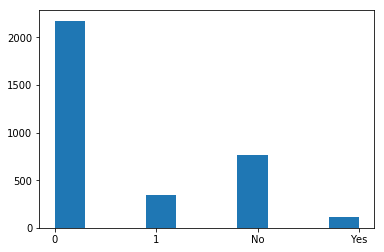

In [8]:
plt.hist(clinical_data.medical_history_3)

In [9]:
demographics.nunique(), 
demographics.gender.unique()
demographics.race.unique()
demographics.resident_status.unique()

(patient_id         3000
 gender                4
 race                  6
 resident_status       4
 date_of_birth      2746
 dtype: int64,)

array(['Female', 'f', 'Male', 'm'], dtype=object)

array(['Indian', 'Chinese', 'Malay', 'chinese', 'India', 'Others'], dtype=object)

array(['Singaporean', 'Singapore citizen', 'PR', 'Foreigner'], dtype=object)

## 3. EDA findings
### clinical_data
1. Total 3000 patients
2. Only medical_history_2 and medical_history_5 has missing values, total 233 and 304 rows of NA values
3. medical_history_1 ~ symptom_5 has only 2 unique values, except for medical_history_3 which has 4 values, which are 0, 1, no, yes, reduce to two, 1 <-> yes, 0 <-> on
4. sum the amount spent for the unique 3400 combinations of patient_id and date_of_admission for clinical data

### demographics
5. demographics.gender has 4 values, should change f to female and m to male
6. demographics.race, change to lower case, Indian == india
7. demographics.resident_status, singaporean == Singapore citizen?

Checked all the four dataframes and found no constant or duplicate columns or rows

## 4. Data cleaning
#### Note 
Here I change medical_history_3 values, 'Yes' <-> 1, 'No' <-> 0, which may be wrong. And based on wikipedia, Singapore citizen == Singaporean.

In [10]:
clinical_data.medical_history_3[clinical_data.medical_history_3 == 'Yes'] = '1'
clinical_data.medical_history_3[clinical_data.medical_history_3 == 'No'] = '0'
clinical_data.medical_history_3 = clinical_data.medical_history_3.astype('int64')

demographics.gender[demographics.gender == 'f'] = 'Female'
demographics.gender[demographics.gender == 'm'] = 'Male'
demographics.race = demographics.race.str.lower()
demographics.race[demographics.race == 'india'] = 'indian'
demographics.resident_status[demographics.resident_status == 'Singapore citizen'] = 'Singaporean'

C:\Users\liumh\Anaconda3_5.0.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\liumh\Anaconda3_5.0.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
clinical_data.medical_history_3.unique()
demographics.gender.unique()
demographics.race.unique()
demographics.resident_status.unique()

array([0, 1], dtype=int64)

array(['Female', 'Male'], dtype=object)

array(['indian', 'chinese', 'malay', 'others'], dtype=object)

array(['Singaporean', 'PR', 'Foreigner'], dtype=object)

### 4.1 Merge data into one dataframe

In [12]:
data = clinical_data.merge(demographics, on = 'patient_id', how = 'left')
data = data.merge(bill_id, on = ['patient_id', 'date_of_admission'], how = 'left')
data = data.merge(bill_amount, on = 'bill_id', how = 'left')

### 4.2 Sum amount spent for rows with same patiend_id and date_of_admission, then drop duplicate rows

In [13]:
tmp = data.groupby(['patient_id', 'date_of_admission'], as_index = False)['amount'].sum().rename(columns = {'amount': 'cost'})
data = data.merge(tmp, on = ['patient_id', 'date_of_admission'], how = 'left')
data.drop(columns = ['amount', 'bill_id'], inplace = True)
data.drop_duplicates(inplace = True)

In [14]:
data.shape,
data.head()

((3400, 31),)

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,cost
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,13.2,30.9,123.0,71.3,161.0,Male,indian,Singaporean,1976-12-19,15405.418665
4,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,13.8,22.6,89.0,78.4,160.0,Female,malay,Singaporean,1978-07-20,23303.000924
8,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,11.2,26.2,100.0,72.0,151.0,Female,indian,Singaporean,1967-08-14,16813.123088
12,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,0,0,0.0,1,1,...,13.3,28.4,76.0,64.4,152.0,Female,chinese,PR,1967-12-06,27994.878530
16,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,0,0,0.0,1,1,...,12.0,27.8,87.0,55.6,160.0,Female,others,PR,1982-07-18,10707.950907


## 5. Generate features based on intuition

In [15]:
for col in ['date_of_admission', 'date_of_discharge', 'date_of_birth']:
    data[col] = pd.to_datetime(data[col])
data['duration'] = data.date_of_discharge - data.date_of_admission
data['duration'] = data['duration'].dt.days                 # Length of stay
data['year_of_admission'] = data.date_of_admission.dt.year  # year at the time of admission
data['age'] = data.date_of_admission - data.date_of_birth   # age at the time of admission
data['age'] = (data['age'].dt.days/365).round(1)
data['BMI'] = data.weight/(data.height/100)**2              # BMI = weight(kg)/(height(m)^2)
data.sort_values(['race', 'resident_status'], ascending = [True, False], inplace = True)
data['citizenship_race'] = data.resident_status + ' ' + data.race 
data.cost = data.cost.round(1) # which maybe the reason for too large values predicted

### 5.1 Encoding categorical features

In [16]:
data_copy = data.copy()  
# create a copy of data
# the data_copy keeps the original values of the 'gender', 'race', 'resident_status', 'citizenship_race' features
index_list = []
for col in ['gender', 'race', 'resident_status', 'citizenship_race']:
    data[col], ls = pd.factorize(data[col])
    index_list.append(ls)
index_list

[Index(['Male', 'Female'], dtype='object'),
 Index(['chinese', 'indian', 'malay', 'others'], dtype='object'),
 Index(['Singaporean', 'PR', 'Foreigner'], dtype='object'),
 Index(['Singaporean chinese', 'PR chinese', 'Foreigner chinese',
        'Singaporean indian', 'PR indian', 'Foreigner indian',
        'Singaporean malay', 'PR malay', 'Foreigner malay',
        'Singaporean others', 'PR others', 'Foreigner others'],
       dtype='object')]

## 6. Findings

### 6.1 Features correlation with cost

([<matplotlib.axis.XTick at 0x22c2c394b38>,
 <a list of 32 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x22c2c3e2828>,
 <a list of 32 Text yticklabel objects>)

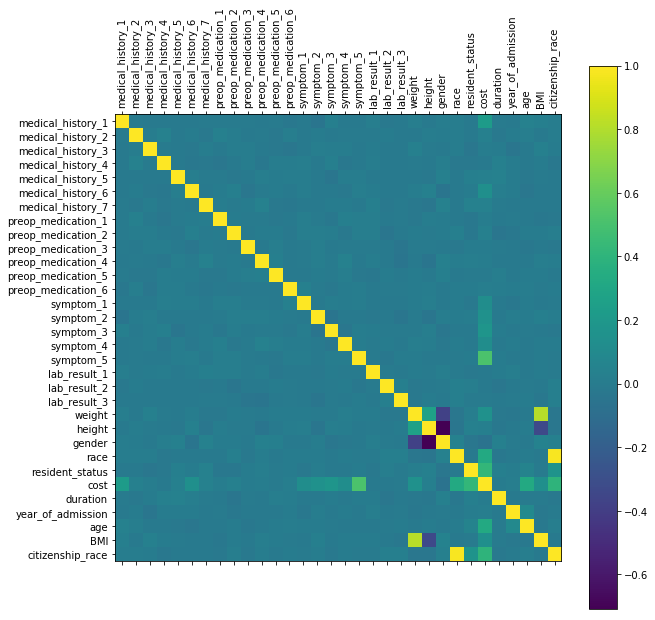

In [17]:
cols = [i for i in data.columns if i not in ['patient_id', 'date_of_admission', 'date_of_discharge','date_of_birth']]
tick_marks = range(len(ls))
labels = ls
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(data[cols].corr())
fig.colorbar(cax)
tick_marks = np.arange(0, len(cols))
plt.xticks(tick_marks, data[cols].columns, rotation = 90)
plt.yticks(tick_marks, data[cols].columns)

In [18]:
data.corr().cost.sort_values(ascending = False)

cost                  1.000000
symptom_5             0.516789
resident_status       0.420373
citizenship_race      0.400176
race                  0.329997
age                   0.325521
medical_history_1     0.226518
symptom_3             0.183988
symptom_2             0.157819
weight                0.157511
medical_history_6     0.141640
BMI                   0.140361
symptom_4             0.130236
symptom_1             0.128317
medical_history_7     0.038952
medical_history_5     0.036146
medical_history_2     0.033965
preop_medication_2    0.032263
height                0.026057
preop_medication_6    0.021606
year_of_admission     0.019194
preop_medication_1    0.016112
preop_medication_4    0.015196
medical_history_3     0.011539
duration              0.009006
preop_medication_3    0.007839
preop_medication_5    0.000453
lab_result_3          0.000092
lab_result_2         -0.005537
lab_result_1         -0.006518
medical_history_4    -0.009356
gender               -0.057739
Name: co

We can see that the top features that have strong correlation with cost are symptom_5, resident_status, citizenship_race, race, and age, we can examine them one by one. Next, let's see the distribution of cost.

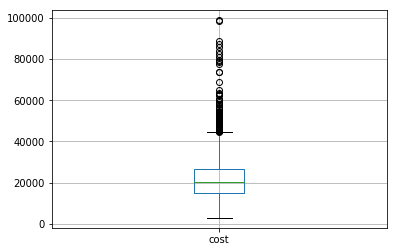

In [19]:
_, bp = data.boxplot(column = 'cost', return_type='both')

We can seperate the data into 5 subsets according to the boxplot above: 
1. outliers
2. data from the 3rd quartile to 4th quartile
3. data from the 2nd quartile to 3rd quartile
4. data from the 1st quartile to 2nd quartile
5. data from the 0th quartile to 1st quartile  

The 5 subsets have 94, 756, 850, 850 and 850 samples respectively, which are shown below.     
Then we can see how largely these top features drive the cost. 

In [20]:
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

data_outliers = data[data.cost > whiskers[1][1]]
data_34 = data[(data.cost > whiskers[1][0]) & (data.cost <= whiskers[1][1])]
data_23 = data[(data.cost > medians[0][0]) & (data.cost <= whiskers[1][0])]
data_12 = data[(data.cost >= whiskers[0][0]) & (data.cost <= medians[0][0])]
data_01 = data[data.cost < whiskers[0][0]]

data_outliers.shape, data_34.shape, data_23.shape,data_12.shape, data_01.shape

((94, 36), (756, 36), (850, 36), (850, 36), (850, 36))

In [ ]:
# # generate new feature cost_cat
# data['cost_cat'] = data.cost.copy()
# data.cost_cat[data.cost > whiskers[1][1]] = 4
# data.cost_cat[(data.cost > whiskers[1][0]) & (data.cost <= whiskers[1][1])] = 3
# data.cost_cat[(data.cost > medians[0][0]) & (data.cost <= whiskers[1][0])] = 2
# data.cost_cat[(data.cost >= whiskers[0][0]) & (data.cost <= medians[0][0])] = 1
# data.cost_cat[data.cost < whiskers[0][0]] = 0

In [21]:
## plotting functions

def boxplots(df_list, titles, column = 'cost', by = 'weight', figsize = (30, 6), xtick_rotation = False):
    length = len(df_list)
    fig, axes  = plt.subplots(1, length, figsize= figsize)
    for i in range(length):
        df_list[i].boxplot(column=[column], by= by, ax = axes[i], showmeans = True)
        axes[i].set_title(titles[i])
        if xtick_rotation == True:
            axes[i].tick_params('x', rotation = 45)
            
def rolling_mean(df_list, titles, column = 'cost', by = 'weight', window = 10, min_periods = 10, figsize = (30, 6), xtick_rotation = False):
    length = len(df_list)
    fig, axes = plt.subplots(1, length, figsize= figsize)
    for i in range(length):
        axes[i].scatter(df_list[i].sort_values(by)[by], pd.rolling_mean(df_list[i].sort_values(by)[column], 
                                                                           window = window, min_periods = min_periods))
        axes[i].set_title(titles[i])
        if xtick_rotation == True:
            axes[i].tick_params('x', rotation = 45)

In [22]:
df_list = [data_copy, data_outliers, data_34, data_23, data_12, data_01]
titles= ['Total', 'Outliers','3rd to 4th Quartile', '2nd to 3rd Quartile', '1st to 2nd Quartile','0th to 1st Quartile']

### Assumption
For medical_history, preop_medication and symptom features that have two values 0 and 1, we assume that 1 represents that the patients have this medical history, have taken this medication and have shown this symptom respectively, and 0 means the contrary.

### 6.2 Symptom_5 
The figures below represent the cost versus symptom 5 for the data and the 5 subsets.
The green triangle marks mean value. We can see that patients with symptom_5 generally spent more than these without symptom_5. Further examination of the relation of symptom_5 with other features shows that it has no obvious correlation with other features. Thus, the cause of symptom_5 is not clear.

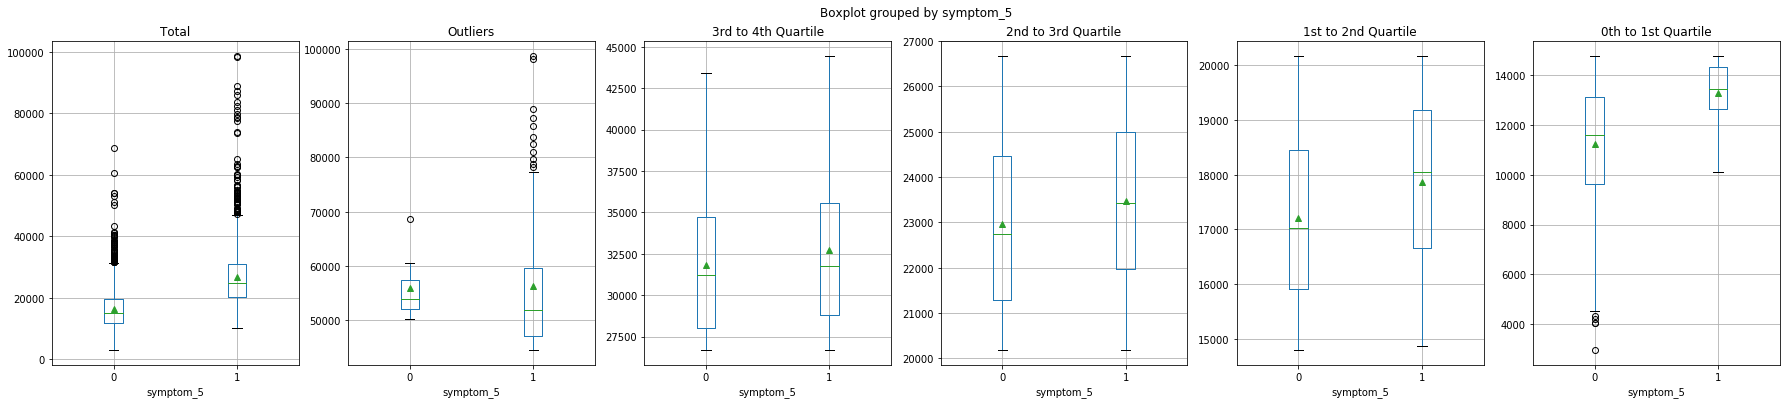

In [23]:
boxplots(df_list, titles, by = 'symptom_5')

### 6.3 Resident status, race
The dataset is balanced among different resident status and race as demonstrated by the following statistics.

In [24]:
data_copy.groupby(['race', 'resident_status'])['patient_id'].nunique()
# balanced dataset, total number of patients: chinese > malay > indian > others

race     resident_status
chinese  Foreigner            94
         PR                  304
         Singaporean        1517
indian   Foreigner            13
         PR                   40
         Singaporean         242
malay    Foreigner            26
         PR                   99
         Singaporean         504
others   Foreigner            10
         PR                   22
         Singaporean         129
Name: patient_id, dtype: int64

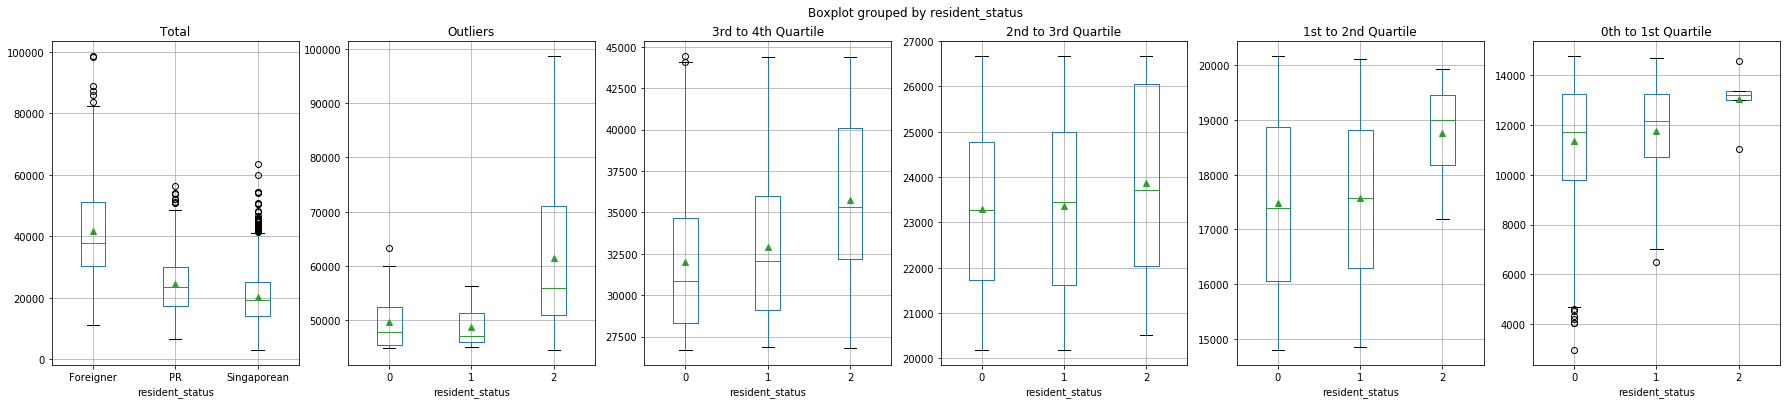

In [25]:
boxplots(df_list, titles, by = 'resident_status')

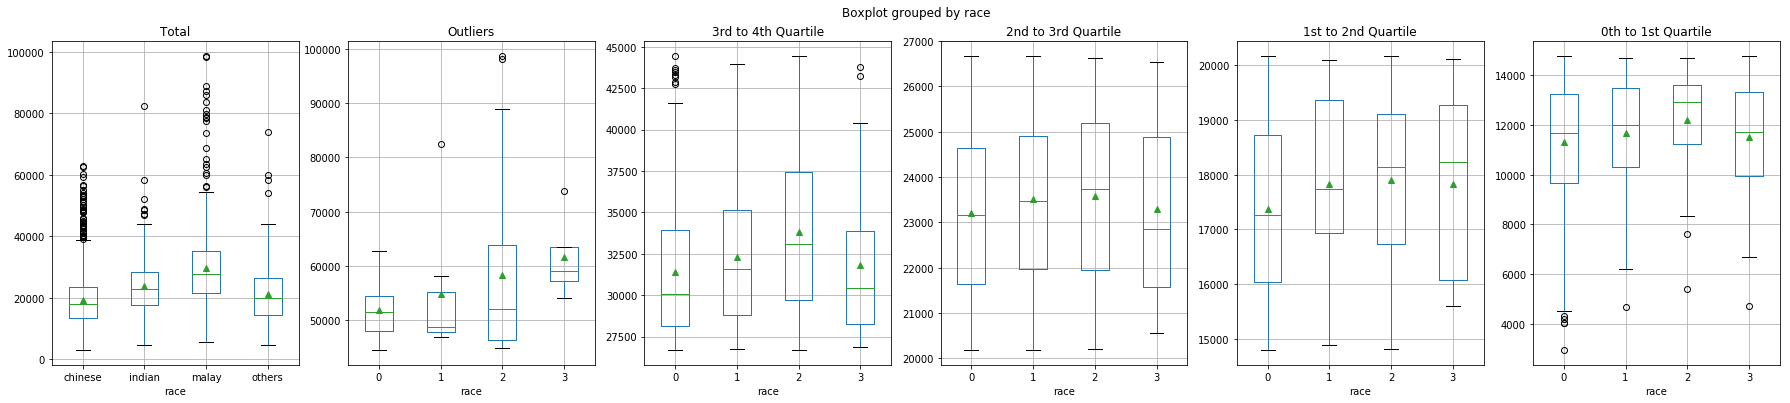

In [26]:
boxplots(df_list, titles, by = 'race')

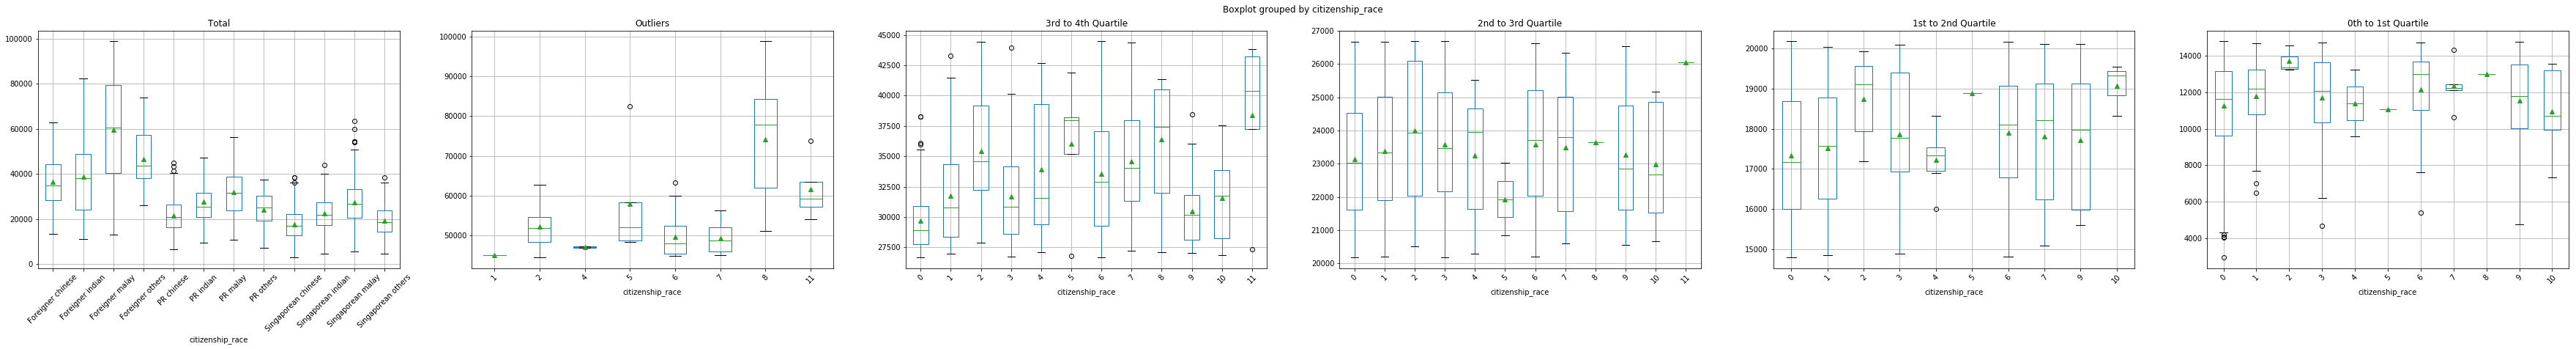

In [27]:
boxplots(df_list, titles, by = 'citizenship_race', figsize = (60, 6), xtick_rotation = True)

#### Conclusions
1. Foreigner spends more than PR and Singporean, and Singaporean spends the least. 
2. Chinese spends the least and Malaysian spends the most. This holds true in most cases among different resident status.     

We wonder what are the reasons account for the relatively high cost of Malaysian? This could be some other important factors which are not included in this dataset.

### 6.4 Age
The figures below show cost versus age for the data and the 5 subsets, which were generated by taking rolling average of 20 samples. The figures show an overall trend of increasing cost as age increases for the data, 2nd to 3rd Quartile and 0th to 1st Quartile subsets. However, this is not obvious for other subsets.

C:\Users\liumh\Anaconda3_5.0.1\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,min_periods=10,center=False).mean()


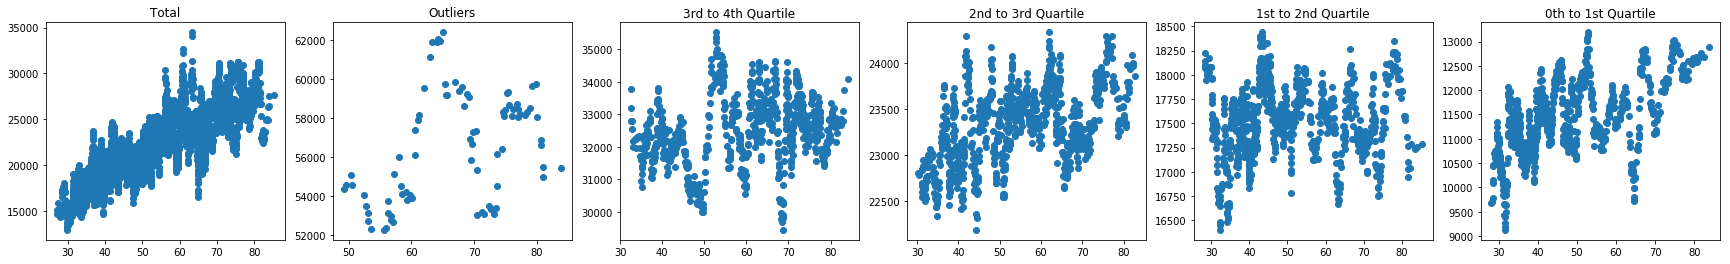

In [28]:
rolling_mean(df_list, titles, column = 'cost', by = 'age', window = 20, min_periods = 10, figsize = (30, 4), xtick_rotation = False)

### 6.5 Weight
The figures below shows cost versus weight for the data and the 5 subsets, which were generated by taking rolling average of 20 samples. The figures show an overall trend of increasing cost as weight increases for the data, 3rd to 4th Quartile and 1st to 2nd Quartile subsets.    
Interestingly, the Outliers subset with highest costs overall depends inversely on the weight.

C:\Users\liumh\Anaconda3_5.0.1\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,min_periods=10,center=False).mean()


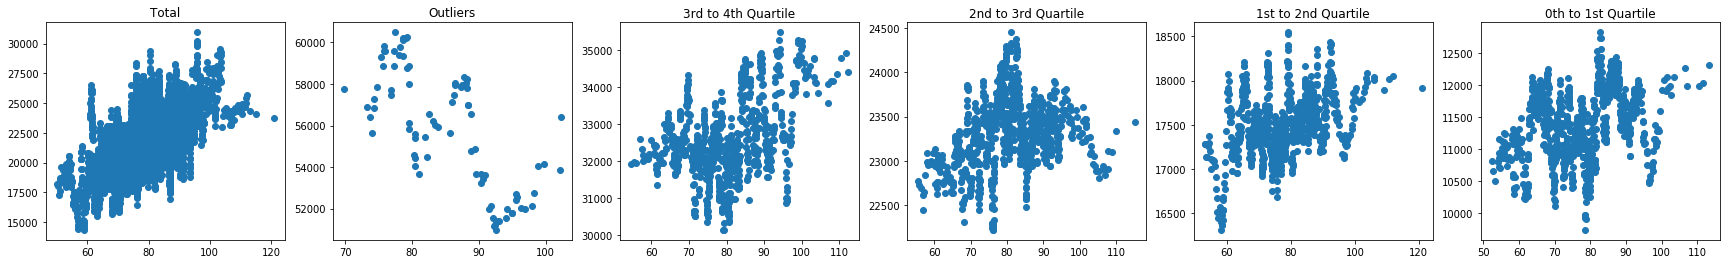

In [29]:
rolling_mean(df_list, titles, column = 'cost', by = 'weight', window = 20, min_periods = 10, figsize = (30, 4), xtick_rotation = False)

## 7. Data modeling
Since most of the features are categorical features, we use CatBoost for data modeling. https://tech.yandex.com/catboost/    
CatBoost uses an efficient method of encoding which is similar to mean encoding but reduces overfitting.

In [30]:
from catboost import Pool, cv, CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [31]:
# specify categorical features for training
cat_features_indices = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,23,24,25,31])
data[cols].columns[cat_features_indices]

Index(['medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'gender', 'race', 'resident_status',
       'citizenship_race'],
      dtype='object')

### 7.1 Data splitting and modeling
The test data was used only for evaluating the trained model and was generated by randomly sample 50 samples from the dataset. Then the remaining 3350 samples random permutated before dividing into 25 folds for cross validation. 


5 models with same hyperparameters were trained and their prediction results were stored in dictionary 'preds' with key values be the random_seed value.

In [34]:
train_data = {}
test_data = {}
cv_datas = {}
models = {}
preds = {}
for i in np.random.randint(0, 1000, 5):
    print(i)
    test = data.sample(50, random_state = i)
    train = data.drop(test.index)
    train = train.fillna(-999)
    test = test.fillna(-999)
    model = CatBoostRegressor(learning_rate = 0.01, iterations = 2000, depth = 3, eval_metric = 'RMSE', 
                             od_type = 'Iter', od_wait = 50, use_best_model = True, logging_level = 'Silent', random_seed = i)
    cv_data = cv(params = model.get_params(), pool = Pool(train[cols], label = train.cost, cat_features = cat_features_indices),
                 fold_count = 25, shuffle = True, partition_random_seed = i)
    train_data[i] = train
    test_data[i] = test
    cv_datas[i] = cv_data
    models[i] = model
    model.fit(train[cols], train.cost, cat_features = cat_features_indices, 
              eval_set = Pool(test[cols], test.cost, cat_features = cat_features_indices))
    pred = model.predict(Pool(test[cols], label = test.cost, cat_features = cat_features_indices))
    preds[i] = pred

254


C:\Users\liumh\Anaconda3_5.0.1\lib\site-packages\catboost\core.py:2271: UserWarning: Parameter "use_best_model" has no effect in cross-validation and is ignored
  warnings.warn('Parameter "use_best_model" has no effect in cross-validation and is ignored')


305


993


367


849


### 7.2  Training and cross validation accuracy 

In [35]:
keys = list(cv_datas)
avg_train = 0
avg_train_std = 0
avg_test = 0
avg_test_std = 0
for key in keys:
    avg_train += np.min(cv_datas[key]['train-RMSE-mean'])
    avg_train_std += cv_datas[key]['train-RMSE-std'][np.argmin(cv_datas[key]['train-RMSE-mean'])]
    avg_test += np.min(cv_datas[key]['test-RMSE-mean'])
    avg_test_std += cv_datas[key]['test-RMSE-std'][np.argmin(cv_datas[key]['test-RMSE-mean'])]
    print('key:  '+ str(key))
    print('Best training accuracy score: {:.6f}±{:.6f} on step {}'.format(
        np.min(cv_datas[key]['train-RMSE-mean']), cv_datas[key]['train-RMSE-std'][np.argmin(cv_datas[key]['train-RMSE-mean'])],
        np.argmin(cv_datas[key]['train-RMSE-mean'])))
    print('Best validation accuracy score: {:.6f}±{:.6f} on step {}'.format(
        np.min(cv_datas[key]['test-RMSE-mean']), cv_datas[key]['test-RMSE-std'][np.argmin(cv_datas[key]['test-RMSE-mean'])],
        np.argmin(cv_datas[key]['test-RMSE-mean'])))
print('\n')
print('Avg training accuracy score: {:.6f}±{:.6f}'.format(avg_train/len(keys), avg_train_std/len(keys)))
print('Avg testing accuracy score: {:.6f}±{:.6f}'.format(avg_test/len(keys), avg_test_std/len(keys)))

key:  254
Best training accuracy score: 663.309666±31.469209 on step 1999
Best validation accuracy score: 1003.314239±588.607782 on step 1999
key:  305
Best training accuracy score: 723.520091±43.508236 on step 1999
Best validation accuracy score: 956.651040±610.406752 on step 1997
key:  993
Best training accuracy score: 733.744627±33.054233 on step 1432
Best validation accuracy score: 960.306981±687.414832 on step 1381
key:  367
Best training accuracy score: 618.192358±39.831022 on step 1999
Best validation accuracy score: 931.116284±589.147774 on step 1999
key:  849
Best training accuracy score: 895.809375±46.104429 on step 1619
Best validation accuracy score: 1002.665957±559.526523 on step 1568


Avg training accuracy score: 726.915224±38.793426
Avg testing accuracy score: 970.810900±607.020733


C:\Users\liumh\Anaconda3_5.0.1\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


### 7.3  Average root mean squared error of predicions on test data

In [74]:
def RMSE(y, pred):
    return mean_squared_error(y, pred)**0.5

i = 0
rmse = 0
for key in keys:
    if i == 0: 
        rmse = RMSE(test_data[key].cost, preds[key])
    else:
        rmse = rmse + RMSE(test_data[key].cost, preds[key])
    i += 1
rmse = rmse/len(keys)
print('Average RMSE: ' + str(rmse))
# print(RMSE(test_data[]))
# plt.scatter(range(50), test.cos|t.reset_index(drop = True))
# plt.scatter(range(50), avg_pred)

Average RMSE: 644.390133119


### 7.4 Visualization of prediction and cost

Text(0.5,1,'key: 254')

Text(0.5,1,'key: 305')

Text(0.5,1,'key: 993')

Text(0.5,1,'key: 367')

Text(0.5,1,'key: 849')

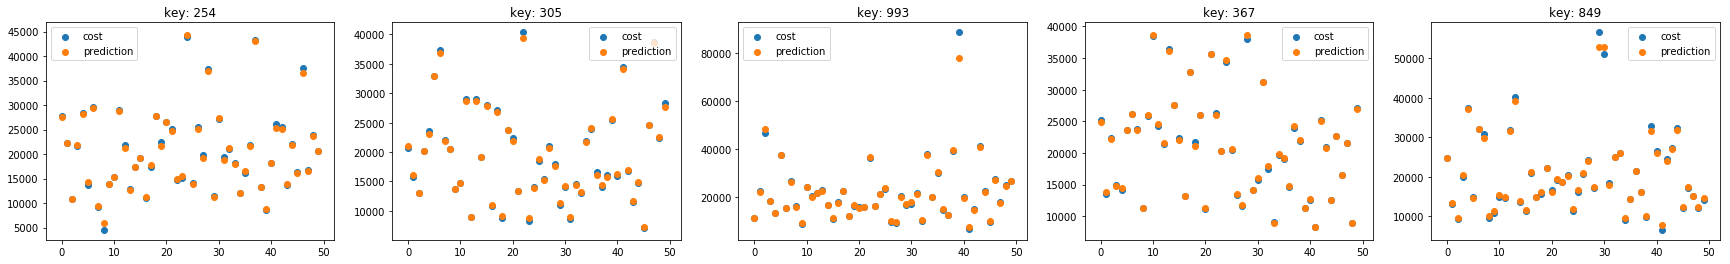

In [77]:
fig, axes  = plt.subplots(1, len(keys), figsize = (30, 4))
for i in range(len(keys)):
    axes[i].scatter(range(50), test_data[keys[i]].cost.reset_index(drop = True))
    axes[i].scatter(range(50), preds[keys[i]])
    axes[i].legend(('cost', 'prediction'))
    axes[i].set_title('key: ' + str(keys[i]))

### 7.5 Feature importance

In [79]:
for key in keys:
    pool = Pool(train_data[key][cols], label = train_data[key].cost, cat_features=cat_features_indices)
    feature_score = models[key].get_feature_importance(pool, fstr_type = 'FeatureImportance')
    feature_score = pd.DataFrame(list(zip(train_data[key][cols].columns, models[key].get_feature_importance(pool, fstr_type = 'FeatureImportance'))),
                    columns=['Feature','Score'])
    feature_score.sort_values('Score', ascending = False)[:6]

,Feature,Score
26,cost,92.781266
17,symptom_5,3.496556
25,resident_status,1.374671
24,race,0.547902
29,age,0.478821
15,symptom_3,0.223953


,Feature,Score
26,cost,95.376317
17,symptom_5,2.473351
24,race,0.485711
25,resident_status,0.347904
12,preop_medication_6,0.194136
29,age,0.151405


,Feature,Score
26,cost,94.695655
17,symptom_5,3.075445
24,race,0.483295
29,age,0.315610
0,medical_history_1,0.225058
15,symptom_3,0.185371


,Feature,Score
26,cost,94.908998
17,symptom_5,2.717631
24,race,0.504645
29,age,0.304196
25,resident_status,0.190455
14,symptom_2,0.178657


,Feature,Score
26,cost,95.942809
17,symptom_5,2.488798
24,race,0.314618
29,age,0.182770
15,symptom_3,0.144562
31,citizenship_race,0.129644


## Supplementary

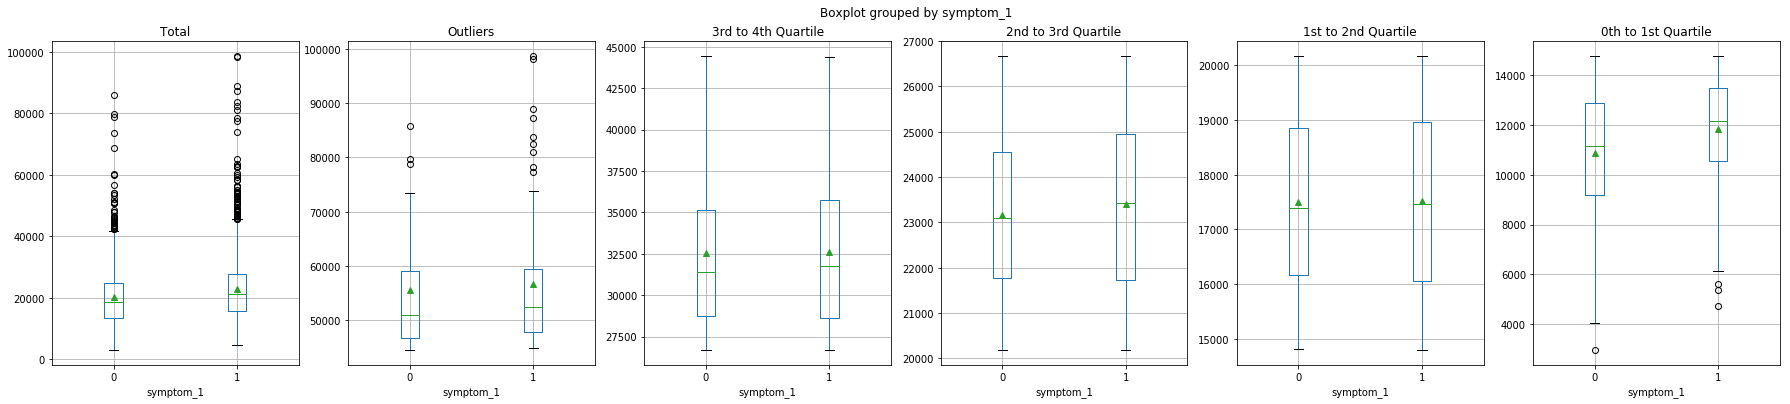

In [80]:
boxplots(df_list, titles, column = 'cost', by = 'symptom_1')

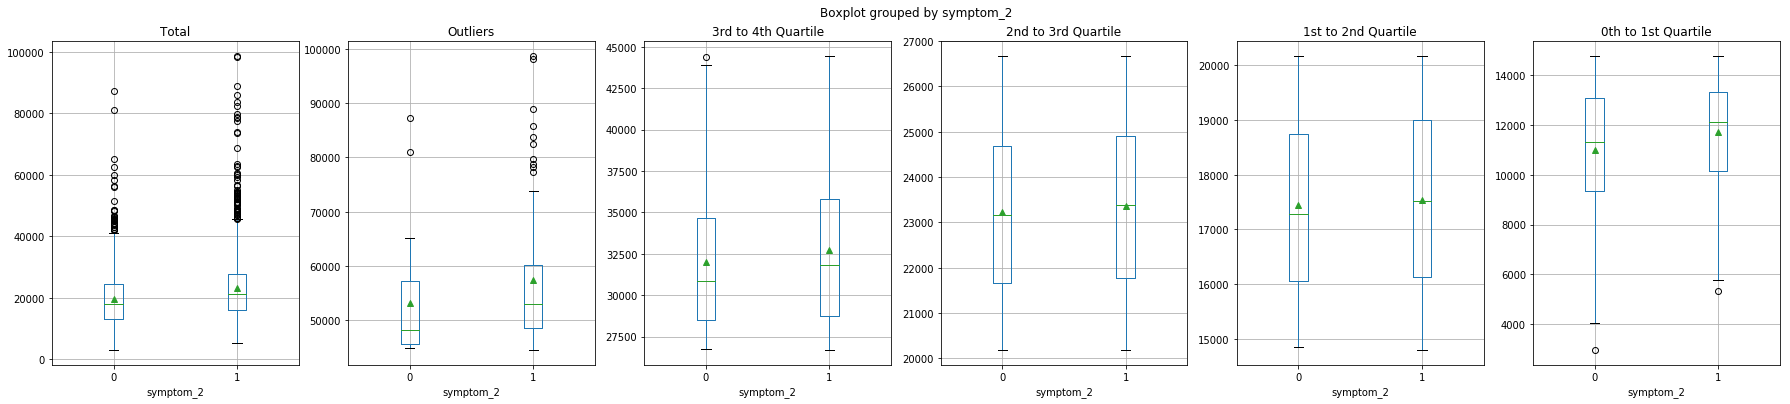

In [81]:
boxplots(df_list, titles, column = 'cost', by = 'symptom_2')

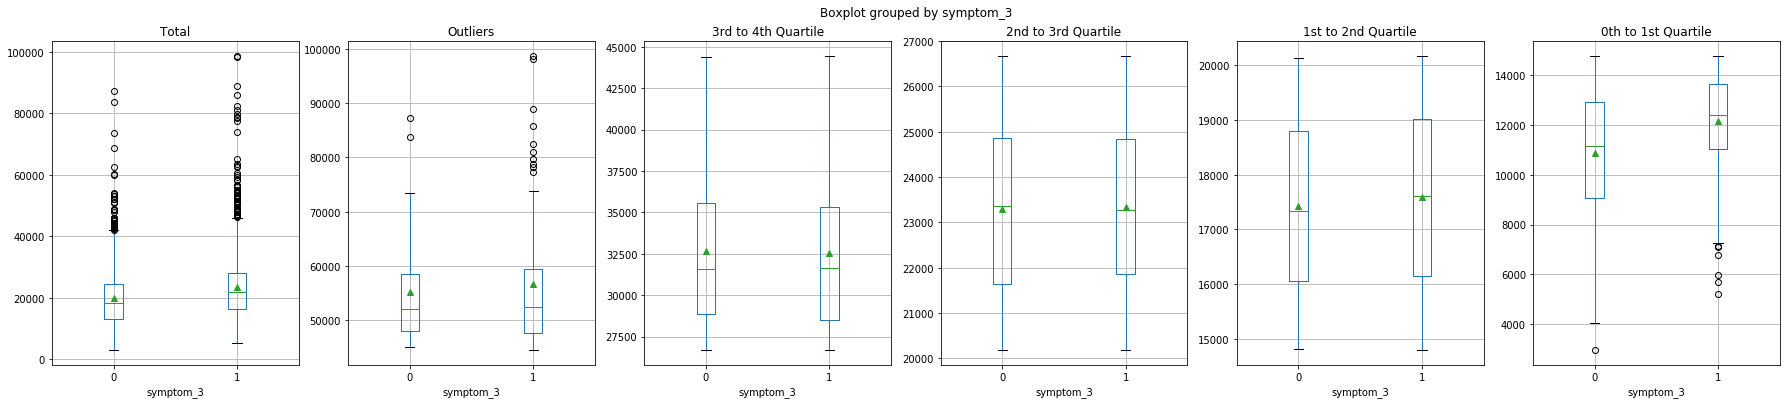

In [82]:
boxplots(df_list, titles, column = 'cost', by = 'symptom_3')

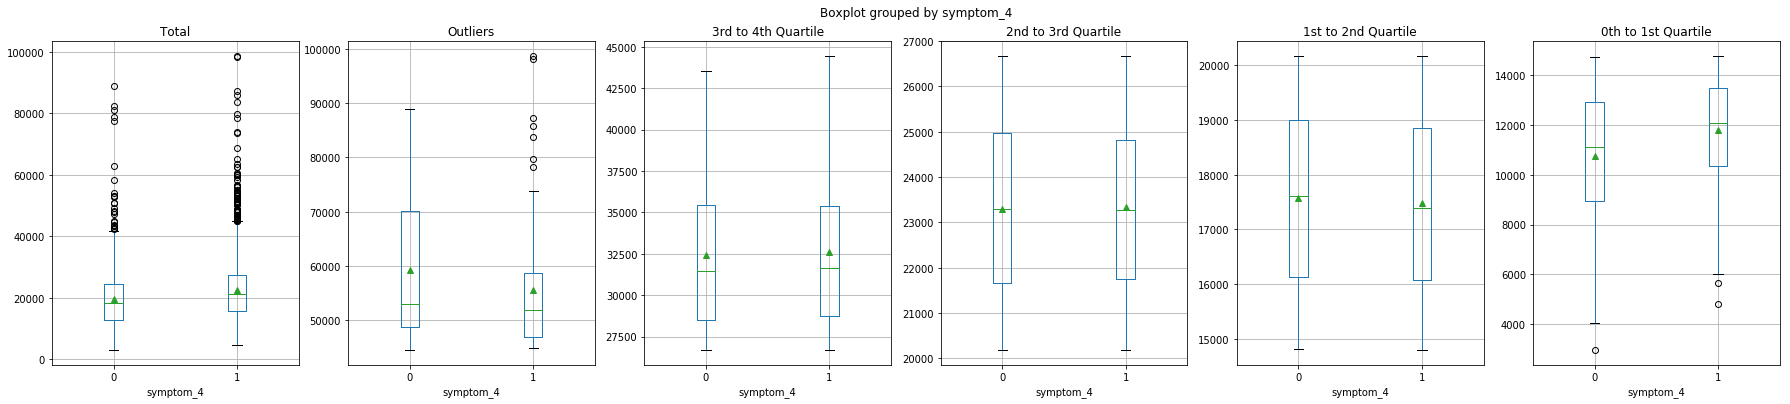

In [83]:
boxplots(df_list, titles, column = 'cost', by = 'symptom_4')

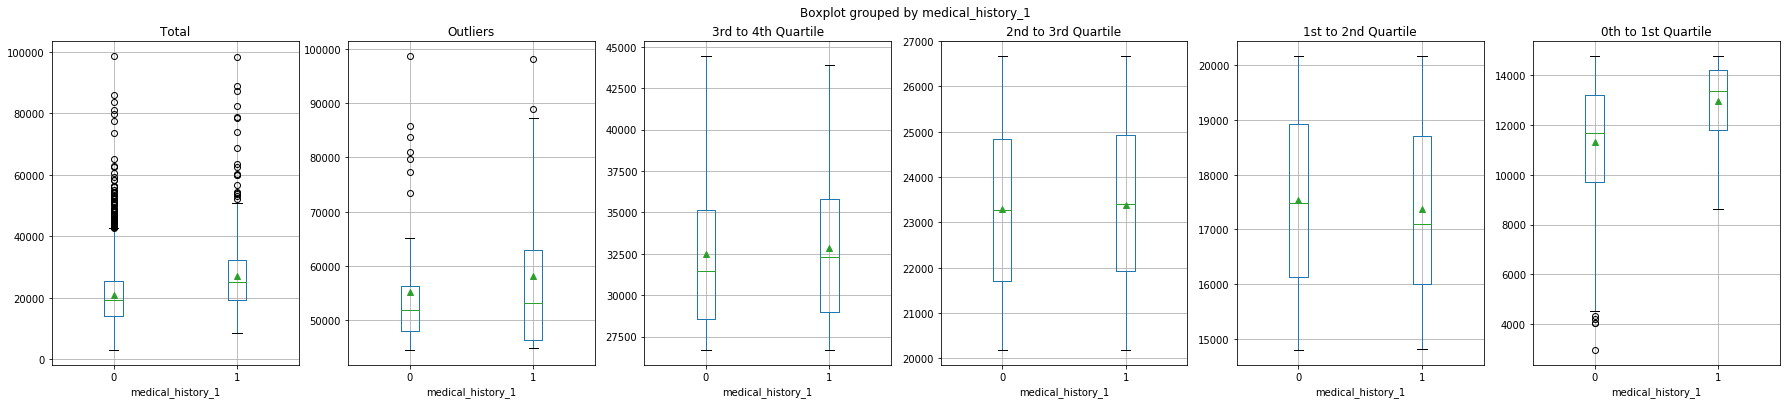

In [84]:
boxplots(df_list, titles, by = 'medical_history_1')

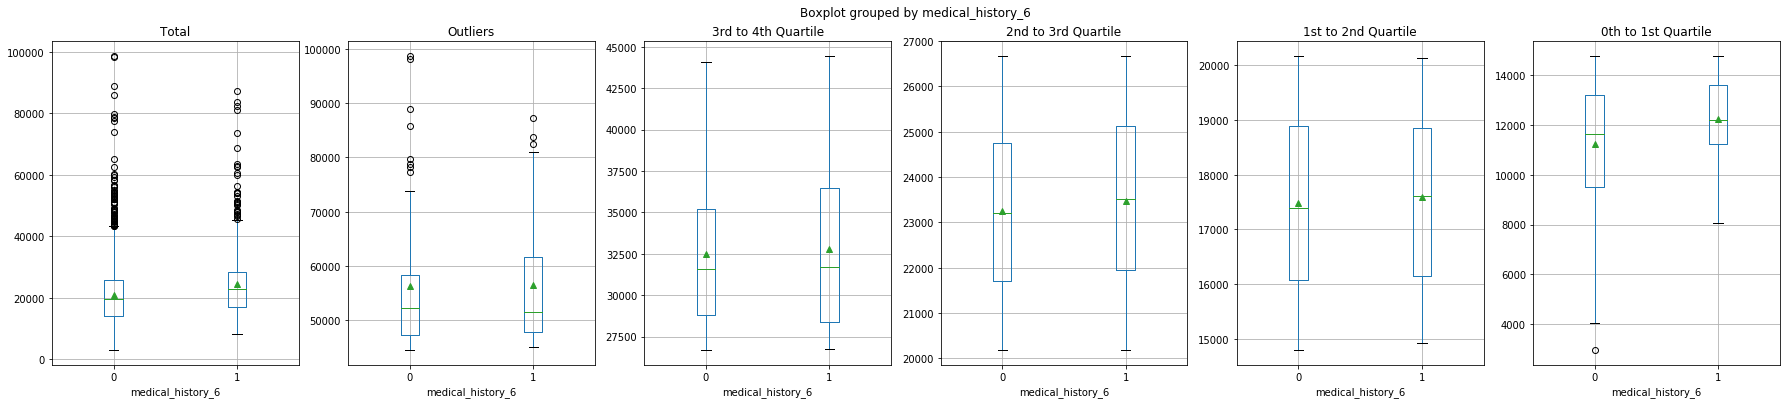

In [85]:
boxplots(df_list, titles, by = 'medical_history_6')

### Hospitalization duration
Surprisingly, the cost does not depend on hospitalization duration. It seems that long hospitalization duration accounts for high cost as shown in Outliers figure. But considering that there is only ~100 samples for Outliers subset and only 12 samples have duration > 16, we can not draw this conclusion at this stage.

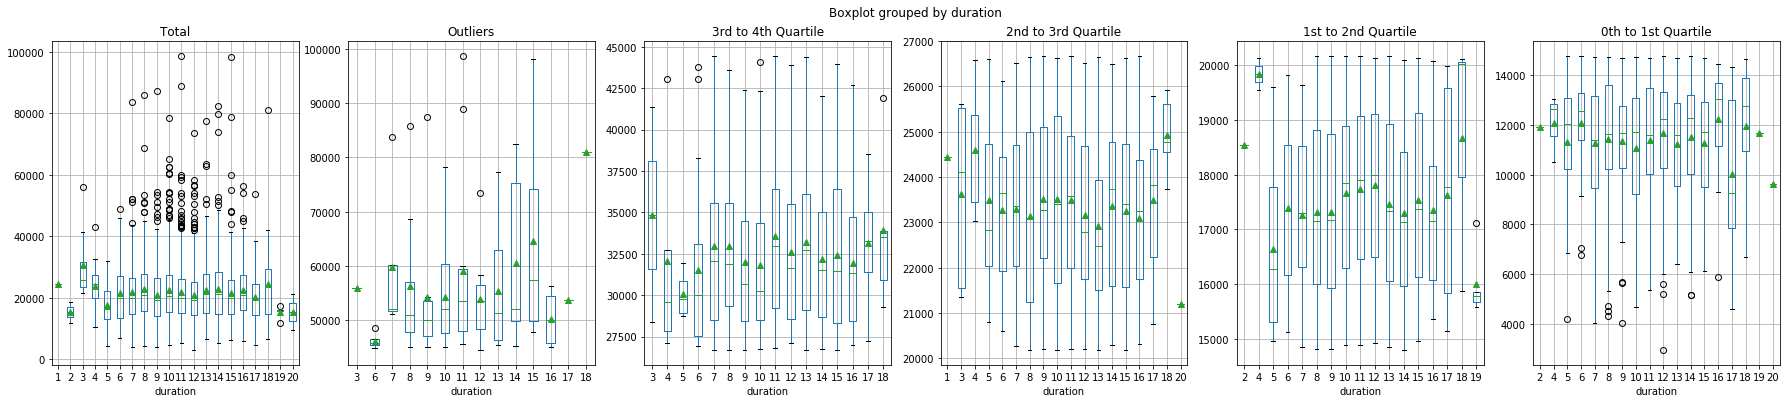

In [73]:
boxplots(df_list, titles, by = 'duration')